In [5]:
import pandas as pd
purchase =pd.read_csv('PURCHASE1.csv')
purchase.head(10)

,USER_GENDER,MARITAL,PRICE,NO_ITEMS,PUR_VALUE,USER_INCOME,PURCHASE
0,1,M,25000.0,0,0.0,39171.0,0
1,1,U,20000.0,2,21866.0,249.0,1
2,0,U,30000.0,1,16090.0,1249.0,0
3,0,U,15000.0,0,0.0,7247.0,1
4,1,U,28000.0,2,26888.0,33314.0,1
5,0,M,14000.0,1,2800.0,0.0,0
6,1,M,20000.0,1,4035.0,27436.0,1
7,1,U,23000.0,1,15125.0,31514.0,0
8,0,U,14000.0,2,16415.0,8745.0,1
9,0,M,30000.0,2,5281.0,0.0,1


In [2]:
purchase.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11157 entries, 0 to 11156
Data columns (total 7 columns):
USER_GENDER    11157 non-null int64
MARITAL        11157 non-null object
PRICE          11145 non-null float64
NO_ITEMS       11157 non-null int64
PUR_VALUE      11155 non-null float64
USER_INCOME    11156 non-null float64
PURCHASE       11157 non-null int64
dtypes: float64(3), int64(3), object(1)
memory usage: 610.2+ KB


# Displaying the summary

In [3]:
purchase.describe()

,USER_GENDER,PRICE,NO_ITEMS,PUR_VALUE,USER_INCOME,PURCHASE
count,11157.000000,11145.000000,11157.000000,11155.000000,11156.000000,11157.000000
mean,0.499149,18239.120682,0.666487,6611.681757,11120.029312,0.331272
std,0.500022,6915.821303,0.659351,7582.199676,13056.105601,0.470692
min,0.000000,9000.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,13000.000000,0.000000,0.000000,560.750000,0.000000
50%,0.000000,16000.000000,1.000000,3505.000000,5723.000000,0.000000
75%,1.000000,24000.000000,1.000000,12614.500000,18018.750000,1.000000
max,1.000000,32000.000000,2.000000,29943.000000,49975.000000,1.000000


In [6]:
!pip install pandas_profiling

You are using pip version 9.0.1, however version 18.1 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [7]:
import pandas_profiling as pf
pf.ProfileReport(purchase)

Number of variables,7
Number of observations,11157
Total Missing (%),0.0%
Total size in memory,610.2 KiB
Average record size in memory,56.0 B
Numeric,4
Categorical,1
Boolean,2
Date,0
Text (Unique),0
Rejected,0


In [6]:
purchase['MARITAL'] =purchase['MARITAL'].replace({'M':1,'U':0})


In [7]:
purchase.head(10)

,USER_GENDER,MARITAL,PRICE,NO_ITEMS,PUR_VALUE,USER_INCOME,PURCHASE
0,1,1,25000.0,0,0.0,39171.0,0
1,1,0,20000.0,2,21866.0,249.0,1
2,0,0,30000.0,1,16090.0,1249.0,0
3,0,0,15000.0,0,0.0,7247.0,1
4,1,0,28000.0,2,26888.0,33314.0,1
5,0,1,14000.0,1,2800.0,0.0,0
6,1,1,20000.0,1,4035.0,27436.0,1
7,1,0,23000.0,1,15125.0,31514.0,0
8,0,0,14000.0,2,16415.0,8745.0,1
9,0,1,30000.0,2,5281.0,0.0,1


In [10]:
#finding there is any missing value uisng data-audit report
#creating data audit report
def var_summary(x):
    return pd.Series([x.count(),x.isnull().sum(),x.sum(),x.mean(),x.median(),x.std(),x.var(),x.std()/x.mean(),x.min(),
                      x.dropna().quantile(0.01),x.dropna().quantile(0.05),x.dropna().quantile(0.1),x.dropna().quantile(0.25),
                      x.dropna().quantile(0.50),
                      x.dropna().quantile(0.75),x.dropna().quantile(0.90),x.dropna().quantile(0.95),x.dropna().quantile(0.99),
                      x.max()],
                      index=['N','NMISS','SUM','MEAN','MEDIAN','STD','VAR','CV','MIN','P1','P5','P10',
                             'P25','P50','P75','P90','P95',
                             'P99','MAX'])
purchase.apply(var_summary)

,USER_GENDER,MARITAL,PRICE,NO_ITEMS,PUR_VALUE,USER_INCOME,PURCHASE
N,11157.000000,11157.000000,1.115700e+04,11157.000000,1.115500e+04,1.115600e+04,11157.000000
NMISS,0.000000,0.000000,0.000000e+00,0.000000,2.000000e+00,1.000000e+00,0.000000
SUM,5569.000000,3086.000000,2.034939e+08,7436.000000,7.375331e+07,1.240550e+08,3696.000000
MEAN,0.499149,0.276598,1.823912e+04,0.666487,6.611682e+03,1.112003e+04,0.331272
MEDIAN,0.000000,0.000000,1.600000e+04,1.000000,3.505000e+03,5.723000e+03,0.000000
STD,0.500022,0.447336,6.912101e+03,0.659351,7.582200e+03,1.305611e+04,0.470692
VAR,0.250022,0.200109,4.777714e+07,0.434744,5.748975e+07,1.704619e+08,0.221551
CV,1.001749,1.617280,3.789712e-01,0.989292,1.146788e+00,1.174107e+00,1.420862
MIN,0.000000,0.000000,9.000000e+03,0.000000,0.000000e+00,0.000000e+00,0.000000
P1,0.000000,0.000000,9.000000e+03,0.000000,0.000000e+00,0.000000e+00,0.000000


In [8]:
#replacing the missing values of price  with their mean
purchase['PRICE']=purchase['PRICE'].fillna(purchase['PRICE'].mean())


In [11]:
purchase.apply(var_summary)

,USER_GENDER,MARITAL,PRICE,NO_ITEMS,PUR_VALUE,USER_INCOME,PURCHASE
N,11157.000000,11157.000000,1.115700e+04,11157.000000,1.115500e+04,1.115600e+04,11157.000000
NMISS,0.000000,0.000000,0.000000e+00,0.000000,2.000000e+00,1.000000e+00,0.000000
SUM,5569.000000,3086.000000,2.034939e+08,7436.000000,7.375331e+07,1.240550e+08,3696.000000
MEAN,0.499149,0.276598,1.823912e+04,0.666487,6.611682e+03,1.112003e+04,0.331272
MEDIAN,0.000000,0.000000,1.600000e+04,1.000000,3.505000e+03,5.723000e+03,0.000000
STD,0.500022,0.447336,6.912101e+03,0.659351,7.582200e+03,1.305611e+04,0.470692
VAR,0.250022,0.200109,4.777714e+07,0.434744,5.748975e+07,1.704619e+08,0.221551
CV,1.001749,1.617280,3.789712e-01,0.989292,1.146788e+00,1.174107e+00,1.420862
MIN,0.000000,0.000000,9.000000e+03,0.000000,0.000000e+00,0.000000e+00,0.000000
P1,0.000000,0.000000,9.000000e+03,0.000000,0.000000e+00,0.000000e+00,0.000000


In [20]:
#replcaing the pur_value with their median
purchase['PUR_VALUE']=purchase['PUR_VALUE'].fillna(purchase['PUR_VALUE'].median())
purchase.apply(var_summary)

,USER_GENDER,MARITAL,PRICE,NO_ITEMS,PUR_VALUE,USER_INCOME,PURCHASE
N,11157.000000,11157.000000,1.115700e+04,11157.000000,1.115700e+04,1.115600e+04,11157.000000
NMISS,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,1.000000e+00,0.000000
SUM,5569.000000,3086.000000,2.034939e+08,7436.000000,7.376032e+07,1.240550e+08,3696.000000
MEAN,0.499149,0.276598,1.823912e+04,0.666487,6.611125e+03,1.112003e+04,0.331272
MEDIAN,0.000000,0.000000,1.600000e+04,1.000000,3.505000e+03,5.723000e+03,0.000000
STD,0.500022,0.447336,6.912101e+03,0.659351,7.581634e+03,1.305611e+04,0.470692
VAR,0.250022,0.200109,4.777714e+07,0.434744,5.748118e+07,1.704619e+08,0.221551
CV,1.001749,1.617280,3.789712e-01,0.989292,1.146799e+00,1.174107e+00,1.420862
MIN,0.000000,0.000000,9.000000e+03,0.000000,0.000000e+00,0.000000e+00,0.000000
P1,0.000000,0.000000,9.000000e+03,0.000000,0.000000e+00,0.000000e+00,0.000000


In [21]:
#replcaing the missing value of user_incone with median
purchase['USER_INCOME']=purchase['USER_INCOME'].fillna(purchase['USER_INCOME'].median())
purchase.apply(var_summary)

,USER_GENDER,MARITAL,PRICE,NO_ITEMS,PUR_VALUE,USER_INCOME,PURCHASE
N,11157.000000,11157.000000,1.115700e+04,11157.000000,1.115700e+04,1.115700e+04,11157.000000
NMISS,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000
SUM,5569.000000,3086.000000,2.034939e+08,7436.000000,7.376032e+07,1.240608e+08,3696.000000
MEAN,0.499149,0.276598,1.823912e+04,0.666487,6.611125e+03,1.111955e+04,0.331272
MEDIAN,0.000000,0.000000,1.600000e+04,1.000000,3.505000e+03,5.723000e+03,0.000000
STD,0.500022,0.447336,6.912101e+03,0.659351,7.581634e+03,1.305562e+04,0.470692
VAR,0.250022,0.200109,4.777714e+07,0.434744,5.748118e+07,1.704492e+08,0.221551
CV,1.001749,1.617280,3.789712e-01,0.989292,1.146799e+00,1.174115e+00,1.420862
MIN,0.000000,0.000000,9.000000e+03,0.000000,0.000000e+00,0.000000e+00,0.000000
P1,0.000000,0.000000,9.000000e+03,0.000000,0.000000e+00,0.000000e+00,0.000000


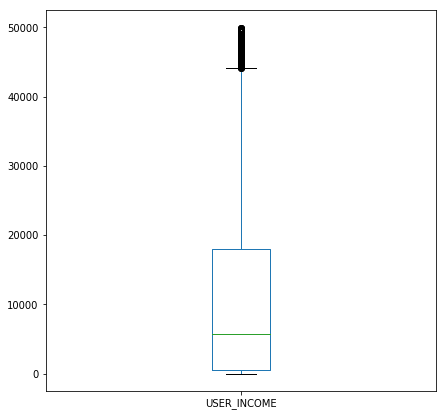

In [12]:
#create a box plot
import matplotlib.pyplot as plt
%matplotlib inline
purchase['USER_INCOME'].plot(subplots=True,kind='box',layout=(1,1),figsize=[7,7])
plt.show()

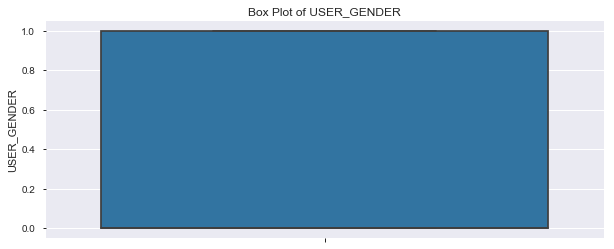

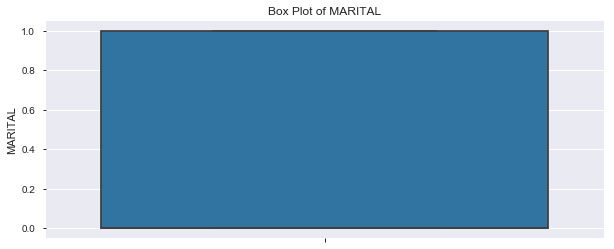

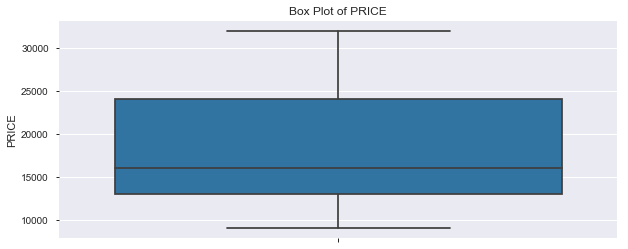

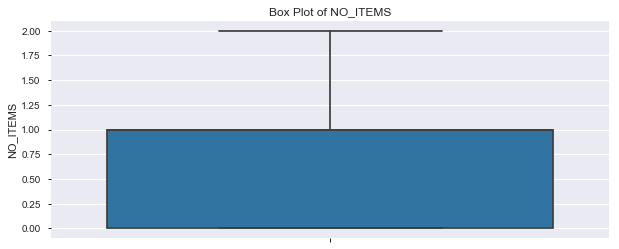

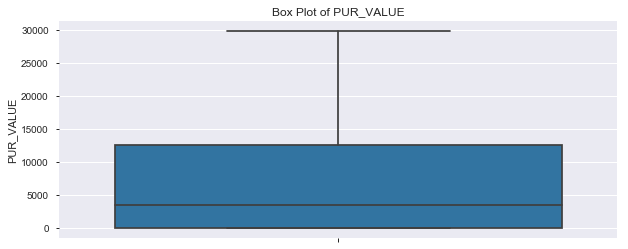

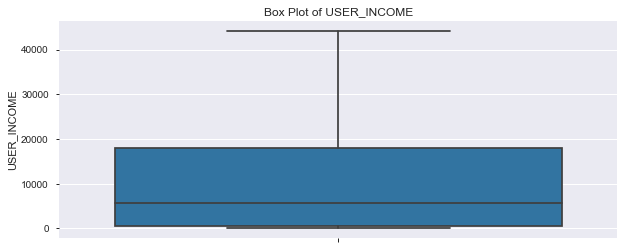

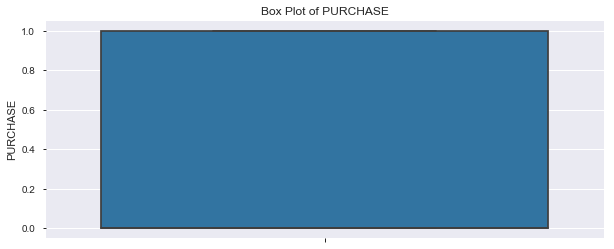

In [61]:
import seaborn as sns
from matplotlib.backends.backend_pdf import PdfPages
var_names =[key for key in dict(purchase.dtypes)]

bp = PdfPages("Boxplots Purchase Data.pdf")
for num_variable in var_names:
    fig,axes =plt.subplots(figsize=(10,4)) ###fig=plt.figure(),axes=fig.add_subplot(figsize=10,4)
    sns.boxplot(y=num_variable,data=purchase)
    plt.title(str('Box Plot of ')+str(num_variable))
    bp.savefig(fig)
bp.close()

In [56]:
#removing outliers by mean+3std
upper=purchase['USER_INCOME'].mean()+3*(purchase['USER_INCOME'].std())
lower=purchase['USER_INCOME'].mean()-3*(purchase['USER_INCOME'].std())

purchase['USER_INCOME']=purchase['USER_INCOME'].clip_upper(upper)
purchase['USER_INCOME']=purchase['USER_INCOME'].clip_lower(lower)

In [60]:
#removing outliers by q3+1.5iqr
upper=purchase['USER_INCOME'].quantile(0.75)+1.5*(purchase['USER_INCOME'].quantile(0.75)-purchase['USER_INCOME'].quantile(0.25))
lower=purchase['USER_INCOME'].quantile(0.75)-1.5*(purchase['USER_INCOME'].quantile(0.75)-purchase['USER_INCOME'].quantile(0.25))

purchase['USER_INCOME']=purchase['USER_INCOME'].clip_upper(upper)
purchase['USER_INCOME']=purchase['USER_INCOME'].clip_lower(lower)

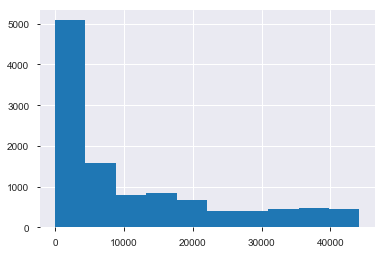

In [62]:
#creating a histogram for the user_income variable
purchase.USER_INCOME.hist()

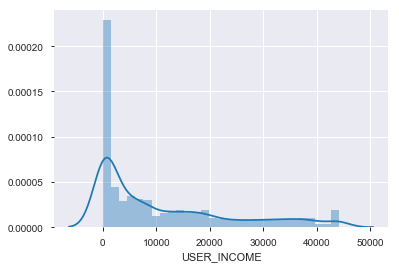

In [63]:
#distribution of variables
sns.distplot(purchase.USER_INCOME)

In [64]:
import numpy as np
np.log?

In [67]:
purchase['LOG_USER_INCOME']=np.log(purchase['USER_INCOME']+1)

In [68]:
purchase.describe()

,USER_GENDER,MARITAL,PRICE,NO_ITEMS,PUR_VALUE,USER_INCOME,PURCHASE,LOG_USER_INCOME
count,11157.000000,11157.000000,11157.000000,11157.000000,11157.000000,11157.000000,11157.000000,11157.000000
mean,0.499149,0.276598,18239.120682,0.666487,6611.124854,11050.899256,0.331272,7.150296
std,0.500022,0.447336,6912.100786,0.659351,7581.634084,12870.147896,0.470692,3.652820
min,0.000000,0.000000,9000.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,13000.000000,0.000000,0.000000,561.000000,0.000000,6.331502
50%,0.000000,0.000000,16000.000000,1.000000,3505.000000,5723.000000,0.000000,8.652423
75%,1.000000,1.000000,24000.000000,1.000000,12613.000000,18018.000000,1.000000,9.799182
max,1.000000,1.000000,32000.000000,2.000000,29943.000000,44203.500000,1.000000,10.696582


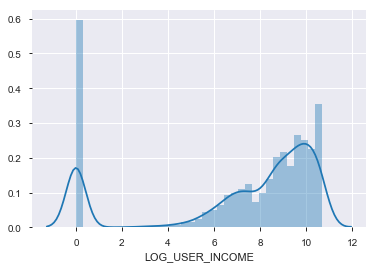

In [69]:
sns.distplot(purchase.LOG_USER_INCOME)

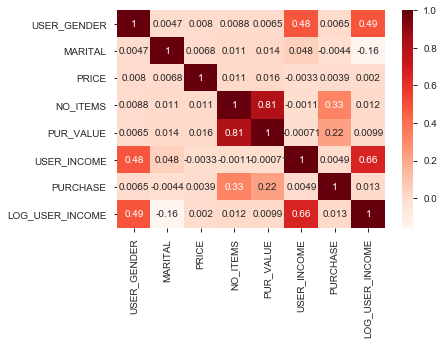

In [70]:
#correlation for heat map
sns.heatmap(purchase.corr(),annot=True,cmap='Reds')
plt.show()

In [71]:
#to find the correlation
purchase.corr()

,USER_GENDER,MARITAL,PRICE,NO_ITEMS,PUR_VALUE,USER_INCOME,PURCHASE,LOG_USER_INCOME
USER_GENDER,1.000000,0.004660,0.007975,0.008791,0.006542,0.482880,0.006531,0.485771
MARITAL,0.004660,1.000000,0.006829,0.011311,0.014056,0.047802,-0.004387,-0.157973
PRICE,0.007975,0.006829,1.000000,0.010784,0.016260,-0.003308,0.003917,0.002013
NO_ITEMS,0.008791,0.011311,0.010784,1.000000,0.810724,-0.001059,0.329455,0.012040
PUR_VALUE,0.006542,0.014056,0.016260,0.810724,1.000000,-0.000707,0.222601,0.009888
USER_INCOME,0.482880,0.047802,-0.003308,-0.001059,-0.000707,1.000000,0.004886,0.664663
PURCHASE,0.006531,-0.004387,0.003917,0.329455,0.222601,0.004886,1.000000,0.013258
LOG_USER_INCOME,0.485771,-0.157973,0.002013,0.012040,0.009888,0.664663,0.013258,1.000000


# understanding the dependence between variables through cross ttables and chi square test of dependence

In [72]:
crosstab =pd.crosstab(purchase['USER_GENDER'],purchase['PURCHASE'])
crosstab

PURCHASE,0,1
USER_GENDER,,
0,3754,1834
1,3707,1862


In [73]:
from scipy import stats

In [79]:
stats.chi2_contingency(crosstab)

(0.22186790924915187,
 0.6376203362035037,
 1,
 array([[4042.37232231, 1545.62767769],
        [4028.62767769, 1540.37232231]]))

In [78]:
crosstab1 =pd.crosstab(purchase['USER_GENDER'],purchase['MARITAL'])
crosstab1

MARITAL,0,1
USER_GENDER,,
0,4054,1534
1,4017,1552


In [80]:
stats.chi2_contingency(crosstab1)

(0.22186790924915187,
 0.6376203362035037,
 1,
 array([[4042.37232231, 1545.62767769],
        [4028.62767769, 1540.37232231]]))

In [91]:
purchase.head(10)

,USER_GENDER,MARITAL,PRICE,NO_ITEMS,PUR_VALUE,USER_INCOME,PURCHASE,LOG_USER_INCOME
0,1,1,25000.0,0,0.0,39171.0,0,10.575717
1,1,0,20000.0,2,21866.0,249.0,1,5.521461
2,0,0,30000.0,1,16090.0,1249.0,0,7.130899
3,0,0,15000.0,0,0.0,7247.0,1,8.888481
4,1,0,28000.0,2,26888.0,33314.0,1,10.413763
5,0,1,14000.0,1,2800.0,0.0,0,0.000000
6,1,1,20000.0,1,4035.0,27436.0,1,10.219648
7,1,0,23000.0,1,15125.0,31514.0,0,10.358219
8,0,0,14000.0,2,16415.0,8745.0,1,9.076352
9,0,1,30000.0,2,5281.0,0.0,1,0.000000


In [95]:
purchase['SAL']=purchase['USER_INCOME'].apply(lambda x: 1 if x<10000 else (2 if (x<=20000 and x>=10000) else 3))

In [96]:
purchase.head(10)

,USER_GENDER,MARITAL,PRICE,NO_ITEMS,PUR_VALUE,USER_INCOME,PURCHASE,LOG_USER_INCOME,SAL
0,1,1,25000.0,0,0.0,39171.0,0,10.575717,3
1,1,0,20000.0,2,21866.0,249.0,1,5.521461,1
2,0,0,30000.0,1,16090.0,1249.0,0,7.130899,1
3,0,0,15000.0,0,0.0,7247.0,1,8.888481,1
4,1,0,28000.0,2,26888.0,33314.0,1,10.413763,3
5,0,1,14000.0,1,2800.0,0.0,0,0.000000,1
6,1,1,20000.0,1,4035.0,27436.0,1,10.219648,3
7,1,0,23000.0,1,15125.0,31514.0,0,10.358219,3
8,0,0,14000.0,2,16415.0,8745.0,1,9.076352,1
9,0,1,30000.0,2,5281.0,0.0,1,0.000000,1


In [97]:
crosstab_sal =pd.crosstab(purchase['SAL'],purchase['PURCHASE'])
crosstab_sal

PURCHASE,0,1
SAL,,
1,4575,2267
2,1299,644
3,1587,785


In [98]:
stats.chi2_contingency(crosstab_sal)

(0.001541658788069518,
 0.9992294676186223,
 2,
 array([[4575.43802097, 2266.56197903],
        [1299.33880075,  643.66119925],
        [1586.22317827,  785.77682173]]))

In [82]:
lead = pd.read_csv('DATASET_LEAD_GENERATION_PURCHASE_MOD.csv')
lead.head(10)

,COUNTRY,CITY,CITY_DETAILS,NAME,MOBILE,AGE,GENDER_CODE,GENDER,INCOME,INCOME_CODE,...,OWN_CAR,HOUSE_LOAN,CAR_LOAN,SMOKER,HEART_DISEASE,DIABETES,MARITAL_STATUS,CHILDREN,OTHER_INSURANCE,PURCHASE
0,IN,D,MUMBAI,EPCYPUIYJ,7044850011,51,0,MALE,923323,1,...,0,0,0,0,0,1,1,1,1,1.0
1,IN,D,MUMBAI,MLGWOVSNU,8712592968,63,0,MALE,301395,3,...,0,0,0,0,0,1,1,1,0,0.0
2,IN,C,BANGALORE,FUAESTLKK,7610555586,64,0,MALE,495029,1,...,0,0,0,0,0,1,1,2,0,0.0
3,IN,A,NAGPUR,UMAFXIRTU,8331385852,70,0,MALE,181833,4,...,0,0,0,0,0,0,1,1,0,0.0
4,IN,D,MUMBAI,KUBLTVBBX,9622263520,20,0,MALE,674640,3,...,0,0,0,1,0,0,0,0,1,0.0
5,IN,B,NASIK,ILBONXYPP,9274487100,33,0,MALE,266167,3,...,0,0,0,1,0,0,1,2,0,0.0
6,IN,C,BANGALORE,LDUBSSVUJ,7077921299,35,0,MALE,938362,2,...,1,0,0,1,0,0,1,1,0,0.0
7,IN,D,MUMBAI,URNCIESQX,9897852928,44,0,MALE,213566,1,...,0,0,0,0,0,0,1,1,0,0.0
8,IN,F,KOLKATA,MQJPMWWRN,7032767111,27,0,MALE,684244,2,...,0,0,0,1,0,0,1,1,1,0.0
9,IN,E,PUNE,KOMRDTGYB,7436473416,66,0,MALE,307924,2,...,0,0,0,0,0,1,1,1,0,0.0


In [83]:
lead.describe()

,MOBILE,AGE,GENDER_CODE,INCOME,INCOME_CODE,OWN_HOUSE,OWN_CAR,HOUSE_LOAN,CAR_LOAN,SMOKER,HEART_DISEASE,DIABETES,MARITAL_STATUS,CHILDREN,OTHER_INSURANCE,PURCHASE
count,2.074200e+04,20742.000000,20742.000000,20742.000000,20742.000000,20742.000000,20742.000000,20742.000000,20742.000000,20742.000000,20742.000000,20742.000000,20742.000000,20742.000000,20742.000000,20741.000000
mean,8.492906e+09,47.742117,0.144730,552339.469048,2.083695,0.336033,0.166715,0.038521,0.037219,0.229968,0.034664,0.310722,0.955067,1.244673,0.280494,0.085772
std,8.663234e+08,16.132894,0.351837,259773.336194,0.893724,0.472362,0.372730,0.192455,0.189303,0.420822,0.182932,0.462800,0.207162,0.696347,0.449251,0.280034
min,7.000161e+09,20.000000,0.000000,100159.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7.741477e+09,34.000000,0.000000,326614.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
50%,8.481134e+09,48.000000,0.000000,554929.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
75%,9.248533e+09,62.000000,0.000000,776662.250000,3.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,2.000000,1.000000,0.000000
max,9.999757e+09,75.000000,1.000000,999981.000000,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000


In [85]:
crosstab_lead_marital =pd.crosstab(lead['MARITAL_STATUS'],lead['PURCHASE'])
crosstab_lead_marital

PURCHASE,0.0,1.0
MARITAL_STATUS,,
0,932,0
1,18030,1779


In [86]:
stats.chi2_contingency(crosstab_lead_marital)

(90.411779245855,
 1.934112453169144e-21,
 1,
 array([[  852.06036353,    79.93963647],
        [18109.93963647,  1699.06036353]]))

In [87]:
crosstab_lead_marital_diabetes =pd.crosstab(lead['MARITAL_STATUS'],lead['DIABETES'])
crosstab_lead_marital_diabetes

DIABETES,0,1
MARITAL_STATUS,,
0,932,0
1,13365,6445


In [88]:
stats.chi2_contingency(crosstab_lead_marital_diabetes)

(438.3884502463838,
 2.4276328138007726e-97,
 1,
 array([[  642.40690387,   289.59309613],
        [13654.59309613,  6155.40690387]]))

In [89]:
crosstab_lead_smoker_heart =pd.crosstab(lead['SMOKER'],lead['HEART_DISEASE'])
crosstab_lead_smoker_heart

HEART_DISEASE,0,1
SMOKER,,
0,15972,0
1,4051,719


In [90]:
stats.chi2_contingency(crosstab_lead_smoker_heart)

(2489.4678641688924, 0.0, 1, array([[15418.34712178,   553.65287822],
        [ 4604.65287822,   165.34712178]]))